# notebook clustering et visualization

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
import scipy.stats as stats

# Plan du notebook:  

1 Import du dataframe  

2 classification hiérarchique ascendante
* 2.1 Dendogramme
* 2.2 cluster avec scikit-Learn
* 2.3 visualisation des clusters

3 K-means
* 3.1 détermination du nombre optimal de cluster (méthode du coude et méthode silhouette)
* 3.2 réalisation du clustering et visualisation

4 ACP
* 4.1 relation entre les variables
* 4.2 projection des pays sur les nouveau plan factoriels

5 comparaisons des 6 clusters k-means et CAH

# 1 import du dataframe créé

In [2]:
# import des donées pour analyse 
# Zone en index
df_complet1 = pd.read_csv("df_complet.csv", index_col=0)
df_complet1

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
Zone,,,,,,,
Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,0.0
Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2
Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8
Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2
Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2
...,...,...,...,...,...,...,...
Émirats arabes unis,9487203.0,1.330455,433000000.0,43.47,42828.653410,0.62,0.0
Équateur,16785361.0,1.752986,0.0,19.31,6100.410171,-0.07,18.9
États-Unis d'Amérique,325084756.0,0.636376,123000000.0,55.68,60297.391594,0.29,2.0


In [3]:
# taille df
df_complet1.shape

(170, 7)

In [4]:
# info df
df_complet1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, Afghanistan to Îles Salomon
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pop                       170 non-null    float64
 1   variation_pop             170 non-null    float64
 2   imp_vol_Kg                170 non-null    float64
 3   dispo_ali_kg_par_pers_an  170 non-null    float64
 4   RNB_USD_par_hab           170 non-null    float64
 5   indice_stab               170 non-null    float64
 6   %_NoAcces_ali_equil       170 non-null    float64
dtypes: float64(7)
memory usage: 10.6+ KB


In [5]:
# Nous enregistrons les noms des pays dans une variable names :
names = df_complet1.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=170)

In [6]:
# et nos colonnes, nos features, dans une variable features :
features = df_complet1.columns
features

Index(['pop', 'variation_pop', 'imp_vol_Kg', 'dispo_ali_kg_par_pers_an',
       'RNB_USD_par_hab', 'indice_stab', '%_NoAcces_ali_equil'],
      dtype='object')

# 2 classification ascendente hiérarchique

## 2.1 Dendogramme

In [7]:
# création de la matrice (array numpy)
X= df_complet1.values
X.shape

(170, 7)

In [8]:
# centrage réduction des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# vérification que les données on été centrées réduites:
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
# Nous enregistrons les noms de nos pays dans une variable pays :
pays = df_complet1.index
# calculer les distances en spécifiant la méthode à utiliser
# utilisation de la méthode Ward (minimise l'inertie intraclasse)
Z = linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,89.0,91.0,0.170785,2.0
1,23.0,101.0,0.244503,2.0
2,110.0,163.0,0.258715,2.0
3,62.0,127.0,0.270315,2.0
4,48.0,82.0,0.294440,2.0
...,...,...,...,...
164,332.0,333.0,11.014550,95.0
165,323.0,327.0,13.171377,25.0
166,334.0,335.0,17.257282,120.0
167,314.0,331.0,17.553539,50.0


In [11]:
# chargement de la librairie graphique
sns.set()

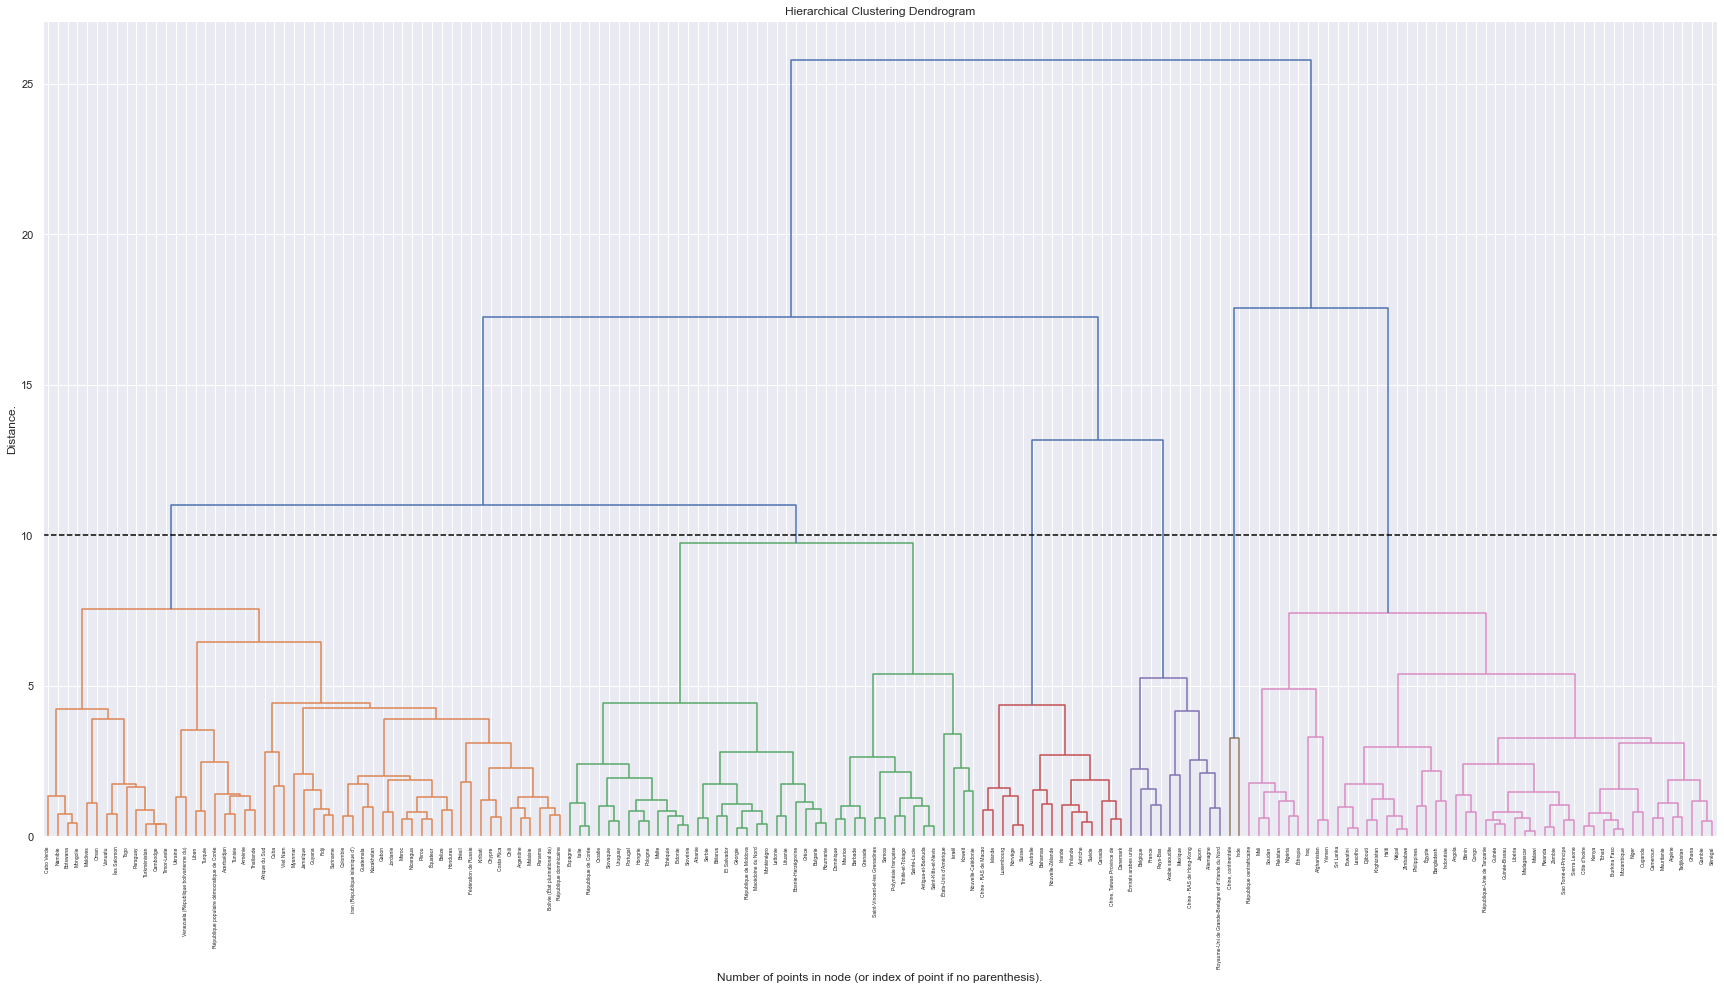

In [12]:
# affichage du premier dendogramme complet
plt.figure(figsize=(30, 15))

dendogramme = dendrogram(Z,labels=pays, color_threshold=10)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.axhline(y=10, color = "black", linestyle= "--")
plt.savefig("dendogramme complet.png", dpi=300, bbox_inches="tight")
plt.show()

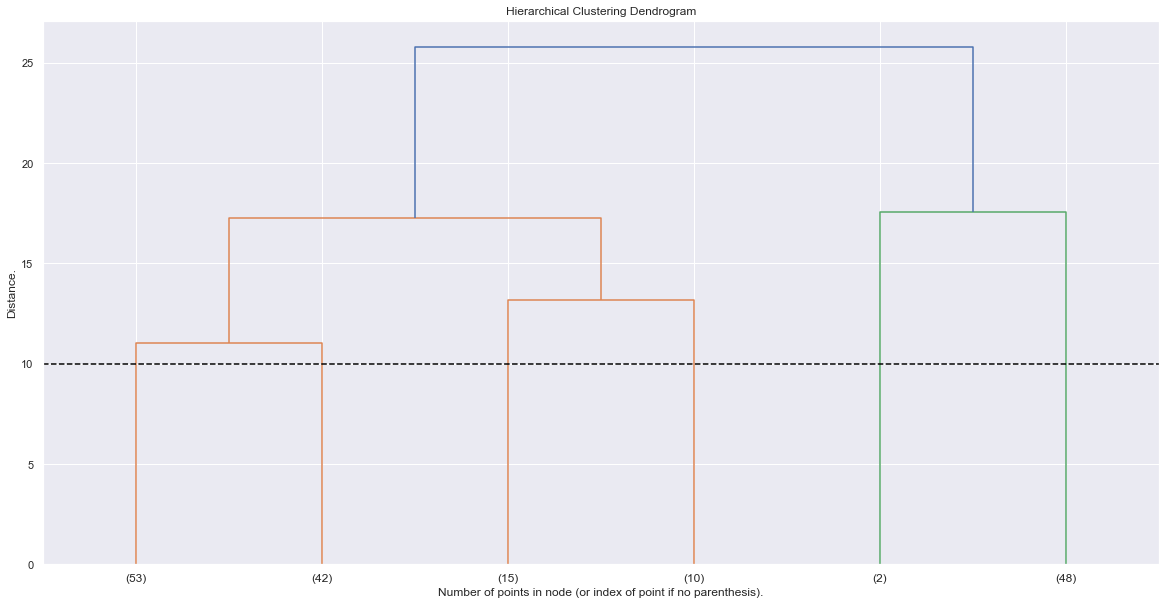

In [13]:
# découpage du dendogramme en 6 groupes
plt.figure(figsize=(20, 10))

dendogramme = dendrogram(Z,labels=pays, p=6, truncate_mode="lastp")

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.axhline(y=10, color = "black", linestyle= "--")
plt.savefig("dendogramme 6 cluster.png", dpi=300, bbox_inches="tight")
plt.show()

Dans le dataframe nous avions 170 pays à classer.  
En regardant les groupes, nous constatons qu'un groupe est constitué de seulement 2 pays. Il s'agit de l'Inde et de la Chine.  
Afin d'avoir un nombre de clusters utilisables tout en conservant un similarité dans les groupes cohérentes j'ai choisi de découper le dendogramme pour avoir 6 groupes

## 2.2 cluster avec scikit-Learn

In [14]:
# avec scipy
# Pour faire la même chose avec scipy, il suffit de prendre notre Z :
Z[:10]

array([[ 89.        ,  91.        ,   0.17078477,   2.        ],
       [ 23.        , 101.        ,   0.24450254,   2.        ],
       [110.        , 163.        ,   0.25871478,   2.        ],
       [ 62.        , 127.        ,   0.27031522,   2.        ],
       [ 48.        ,  82.        ,   0.29443999,   2.        ],
       [124.        , 162.        ,   0.32073484,   2.        ],
       [ 41.        ,  78.        ,   0.33970332,   2.        ],
       [ 73.        , 126.        ,   0.34151054,   2.        ],
       [  6.        , 131.        ,   0.35776493,   2.        ],
       [ 47.        , 139.        ,   0.3669984 ,   2.        ]])

In [15]:
# Ensuite on défini le nombre de clusters que l'on souhaite:
k = 6

In [16]:
# On applique ensuite la fonction fclustersde scipypour définir les clusters :
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([6, 1, 2, 6, 4, 6, 2, 4, 1, 1, 3, 3, 1, 3, 6, 2, 4, 1, 1, 2, 1, 1,
       2, 6, 2, 6, 1, 1, 6, 3, 1, 4, 3, 3, 5, 1, 1, 6, 1, 2, 1, 6, 3, 6,
       2, 2, 2, 2, 6, 1, 3, 4, 1, 1, 6, 6, 2, 2, 1, 6, 6, 1, 2, 6, 1, 2,
       5, 6, 1, 6, 3, 3, 2, 2, 1, 4, 1, 1, 6, 6, 1, 2, 6, 2, 1, 6, 2, 3,
       2, 6, 1, 6, 1, 6, 2, 1, 2, 6, 4, 1, 2, 6, 1, 1, 1, 6, 6, 3, 2, 3,
       6, 1, 6, 6, 1, 1, 4, 6, 2, 2, 2, 1, 2, 4, 6, 6, 2, 2, 1, 1, 6, 2,
       2, 2, 2, 6, 2, 6, 2, 2, 6, 6, 3, 1, 3, 6, 6, 6, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 6, 6, 6, 6, 4, 1, 2, 6, 1], dtype=int32)

In [79]:
# ajout de la colonne label
df_complet1["cluster"] = clusters
df_complet1

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil,cluster
Zone,,,,,,,,
Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,0.0,6
Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2,1
Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8,2
Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2,6
Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2,4
...,...,...,...,...,...,...,...,...
Émirats arabes unis,9487203.0,1.330455,433000000.0,43.47,42828.653410,0.62,0.0,4
Équateur,16785361.0,1.752986,0.0,19.31,6100.410171,-0.07,18.9,1
États-Unis d'Amérique,325084756.0,0.636376,123000000.0,55.68,60297.391594,0.29,2.0,2


In [18]:
# regroupement des pays par cluster et moyenne sur les variables
centroide_cah = df_complet1.groupby("cluster").mean().reset_index()
centroide_cah

,cluster,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
0,1,2.470654e+07,1.365225,5.301887e+07,21.629623,6241.125170,-0.144528,21.116981
1,2,1.593866e+07,0.135287,4.502381e+07,31.535714,16614.690606,0.439524,5.400000
2,3,9.339853e+06,0.924083,6.100000e+07,28.245333,57791.696196,1.131333,0.280000
3,4,5.448442e+07,0.741255,7.176000e+08,29.865000,38032.092853,0.373000,3.010000
4,5,1.379849e+09,0.774195,2.260000e+08,7.275000,5317.332993,-0.380000,44.600000
5,6,3.971579e+07,2.281227,4.116667e+07,5.335000,1565.287655,-0.869792,75.577083


En regardant les moyennes de chacune des variables des clusters (les centroides), on observe que 3 clusters ce détachent.  
Les clusters 2, 3 et 4 on une importante conso pas habitant de volailles, un RNB élevé, un indice de stabilité politique bon et enfin un bon acces à l'alimentation équilibré.
Mais avec ces 3 cleuster, il nous reste encore beaucoup de trop de pays dans l'étude pour faire une choix: il reste encore 67 pays.  
A contrario, le cluster 6 cumule les mauvais résultat sur ses centroïdes.

## 2.3 visualisation des clusters

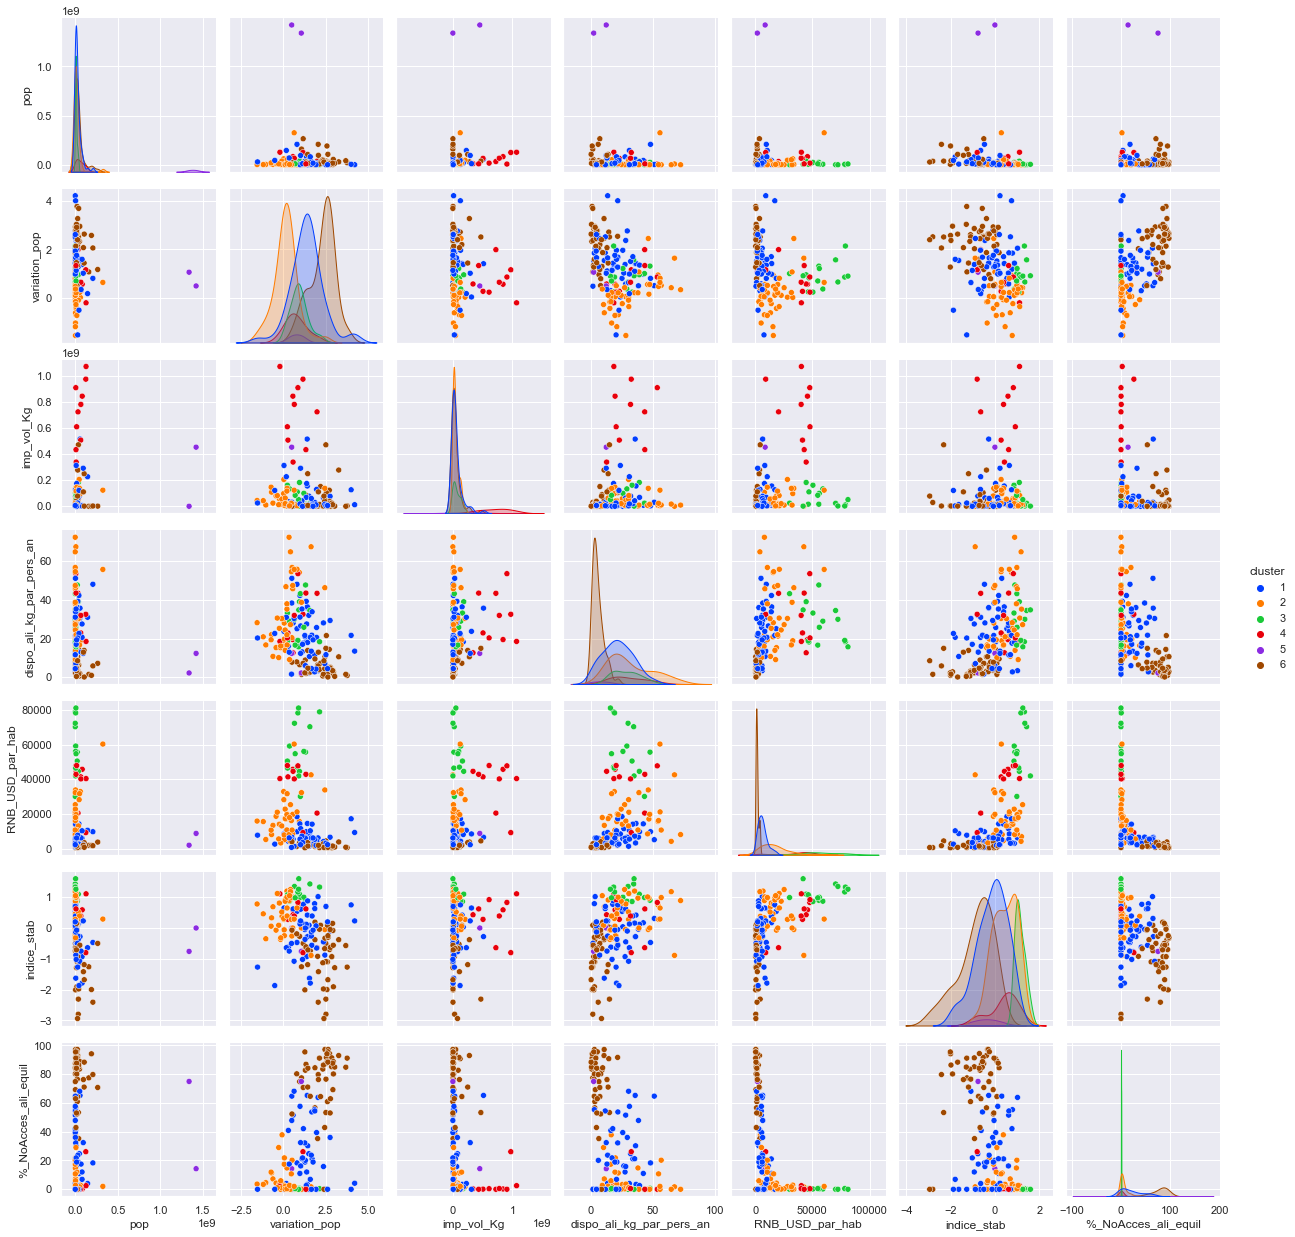

In [19]:
# visualisation des nuage de points en croisant les variables
sns.pairplot(df_complet1, hue="cluster", palette="bright")
plt.savefig("graph coirsé variable.png", dpi=300, bbox_inches="tight")

En utilisant cette visualisation en nuage de point, il semble que les clusters 3 et 4 se détacher des autres sur plusieurs croisement de variable.  
Afin de confirmer cette première impression une autre visualisation sous forme de boxplot pourrait nous aider

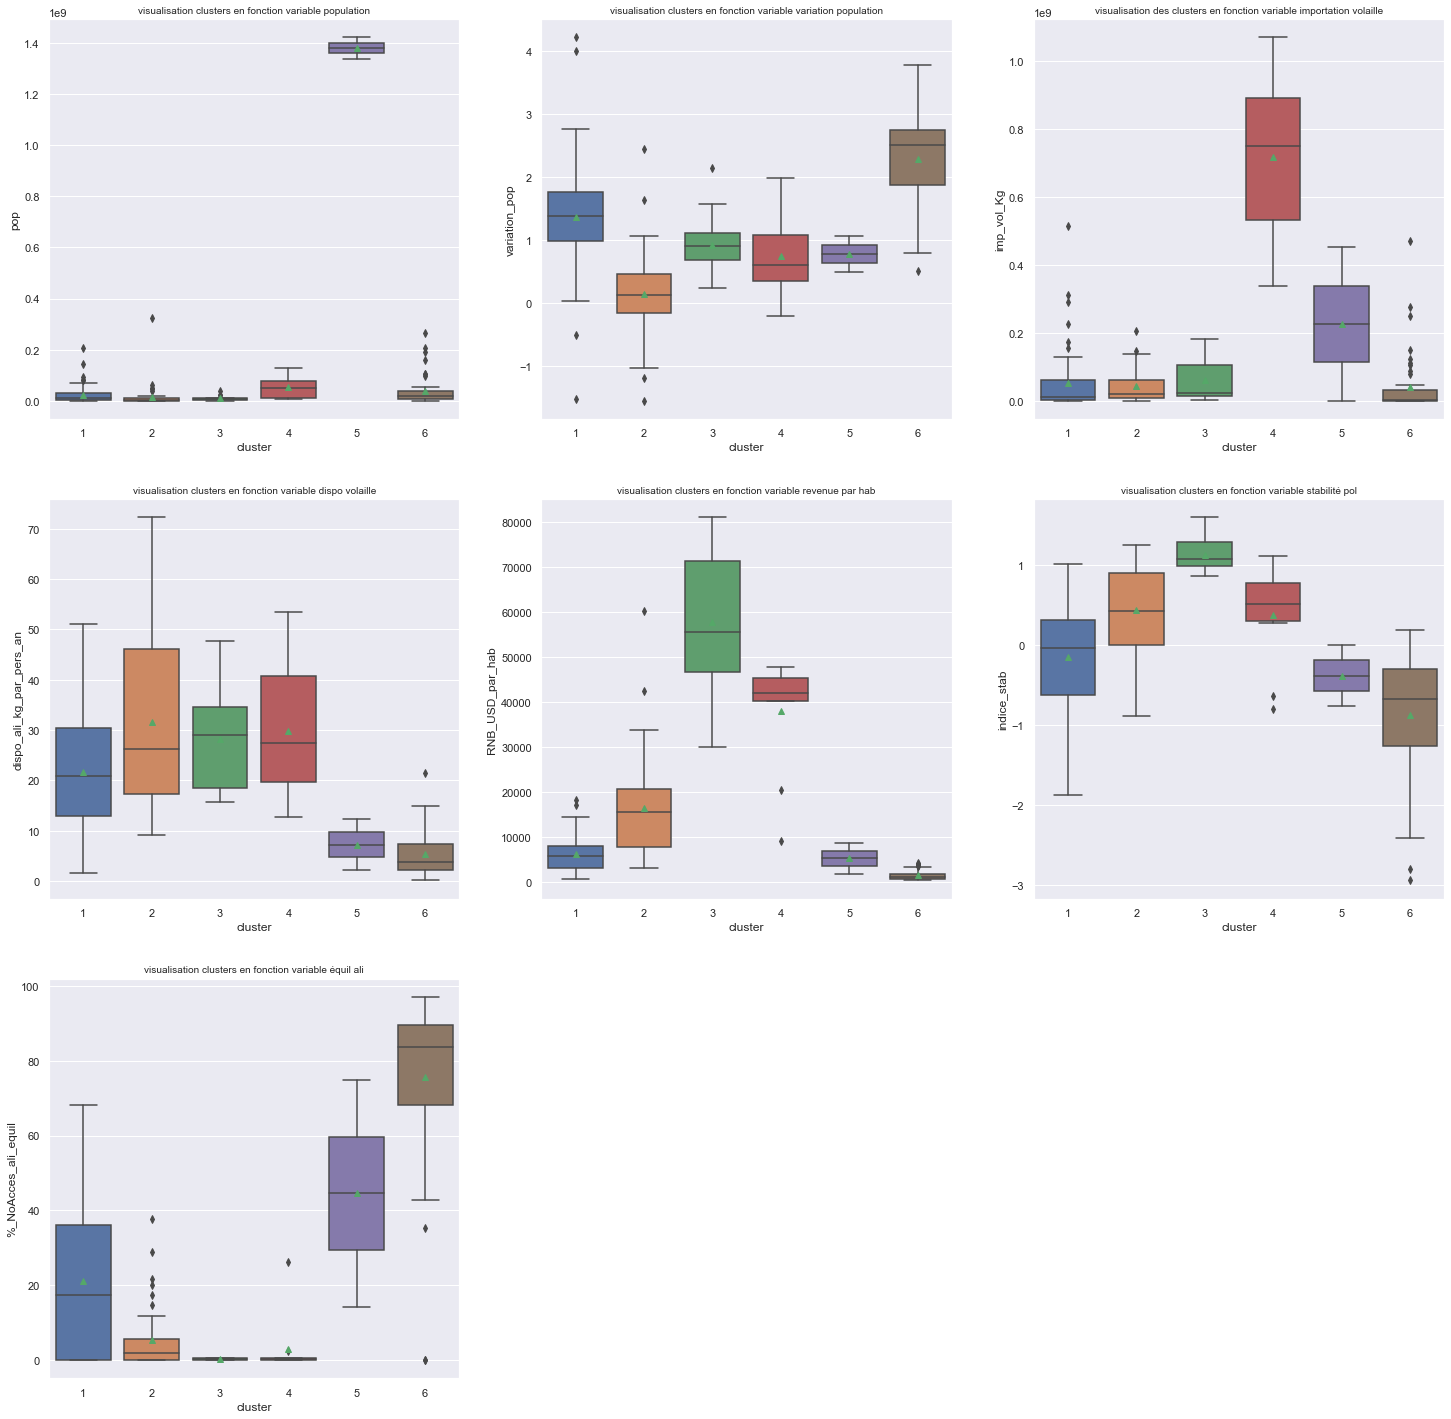

In [20]:
# visualisation en boxplot
plt.figure(figsize=(25,25))

plt.subplot(331)
sns.boxplot(data=df_complet1, x="cluster", y="pop", showmeans=True)
plt.title("visualisation clusters en fonction variable population", fontsize =10)

plt.subplot(332)
sns.boxplot(data=df_complet1, x="cluster", y="variation_pop", showmeans=True)
plt.title("visualisation clusters en fonction variable variation population", fontsize =10)


plt.subplot(333)
sns.boxplot(data=df_complet1, x="cluster", y="imp_vol_Kg", showmeans=True)
plt.title("visualisation des clusters en fonction variable importation volaille", fontsize =10)

plt.subplot(334)
sns.boxplot(data=df_complet1, x="cluster", y="dispo_ali_kg_par_pers_an", showmeans=True)
plt.title("visualisation clusters en fonction variable dispo volaille", fontsize =10)

plt.subplot(335)
sns.boxplot(data=df_complet1, x="cluster", y="RNB_USD_par_hab", showmeans=True)
plt.title("visualisation clusters en fonction variable revenue par hab", fontsize =10)

plt.subplot(336)
sns.boxplot(data=df_complet1, x="cluster", y="indice_stab", showmeans=True)
plt.title("visualisation clusters en fonction variable stabilité pol", fontsize =10)

plt.subplot(337)
sns.boxplot(data=df_complet1, x="cluster", y="%_NoAcces_ali_equil", showmeans=True)
plt.title("visualisation clusters en fonction variable équil ali", fontsize =10)

plt.savefig("boxplot cluster CAH.png", dpi=300, bbox_inches="tight")
plt.show()

* Sur la variable population, c'est le cluster 5 qui se détache fortement des autres. Il s'agit de celui qui regroupe la Chine et l'Inde qui représentent plus de 2 milliard d'habitant. Tout les autres clusters sont très proche concernant cette variable et ne se distingue pas particulièrement les uns des autres.  
* sur la variable variation de la population, le cluster 6 est celui qui a le plus de variation de pop. Il est suivit du cluster 1, les clusters 3, 4 et 5 sont très proche sur le point de la variation de la pop. En fin de classement nous trouvons le cluster 2.  
* Concernant les imports de volaille, le cluster 4 est largement en tête avec une médiane d'importation d'environ 750 millions de kilo, les pays du cluster 4 (les 25% important le plus) importent plus d'un milliard de kilo de poulet par an. Le cluster 5 importe également énomément de volaille (mediane de 226 million de kilo). Les autres clusters sont beaucoup plus bas en matière d'importation de volaille.  
* Concernant la disponibilité de volaille par habitant, les cluster 2, 3 et 4 ont des médianes très proches. la médiane du cluster 3 est la plus élevée mais le clusters 2 a les pays qui consomme le plus de poulet par habiant. Le cluster 5 et 6 sont en fin de classement, pour le cluster 5 c'est la conséquence de la forte population (malgré de fortes importation une fois ramené au nombre d'habitant la consommation de poulet par habitant est plutot faible).
* Concernant le revenu par habitant, les cluster 3 et 4 sont largement en tête avec avantage pour le cluster 3. Ces clusters ont donc les pays avec les meilleurs revenu par habitant. 
* Concernant la stabilité des pays le cluster 3 est en tête, suivit par les clusters 2 et 4 quasiment à égalité au niveau de la médiane. les pays du cluster 6 sont très instable politiquement.
* Concernant les difficultés d'acces a une alimentation équilibré, les cluster 6, 5 sont largement en tête, leur population à donc énormément de difficulté à accéder à de l'alimentation de bonne qualité. C'est aussi le cas pour le cluster 1 dans une moindre mesure. Avec leur très faible score, les cluster 3 et 4 ont les pays avec le meilleurs acces à une alimentation de qualité.  

Le cluster 6 est celui qui cumul le plus mauvais résultat sur les différentes variables en notre possession et donc les pays a éviter pour le développement de l'entreprise.  

Les cluster 3 et 4 ont de meilleurs scores de façon générale sur les autres clusters.    
  
les boxplots confirment que ce sont les deux clusters à retenir. Si un choix devait être fait entre les deux, le cluster 4 serait celui à privilégier car il regoupe en moyenne les meilleurs score sur l'ensemble des variables.

In [21]:
# regroupement des pays par cluster et médiane sur les variables
median_clust = df_complet1.groupby("cluster").median().reset_index()
median_clust

,cluster,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
0,1,9.785843e+06,1.377864,12000000.0,20.960,5934.255910,-0.040,17.50
1,2,3.394083e+06,0.130284,21000000.0,26.220,15611.114919,0.425,1.80
2,3,5.511371e+06,0.897455,24000000.0,28.980,55633.452640,1.080,0.20
3,4,4.897184e+07,0.607875,750500000.0,27.420,42100.608071,0.510,0.25
4,5,1.379849e+09,0.774195,226000000.0,7.275,5317.332993,-0.380,44.60
5,6,2.016063e+07,2.504525,3500000.0,3.780,1275.059579,-0.670,83.80


In [22]:
# liste des pays des 2 clusters retenus suite à l'analyse
cluster_cah = df_complet1.loc[(df_complet1["cluster"]== 3) | (df_complet1["cluster"]== 4),]
cluster_cah

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil,cluster
Zone,,,,,,,,
Allemagne,82658409.0,0.562122,8.420000e+08,19.47,45734.557505,0.59,0.2,4
Arabie saoudite,33101179.0,1.987035,7.220000e+08,43.36,20451.017286,-0.64,0.0,4
Australie,24584620.0,1.309388,1.600000e+07,47.65,55633.452640,0.90,0.7,3
Autriche,8819901.0,0.823138,1.100000e+08,18.20,46984.806575,1.05,0.6,3
Bahamas,381755.0,1.001952,2.400000e+07,43.17,30065.911483,0.99,0.0,3
Belgique,11419748.0,0.572062,3.380000e+08,12.65,44567.104136,0.43,0.3,4
Canada,36732095.0,0.950534,1.820000e+08,39.02,44551.243918,1.10,0.7,3
Chine - RAS de Hong-Kong,7306322.0,0.859256,9.070000e+08,53.51,47724.637597,0.83,0.0,4
Chine - RAS de Macao,622585.0,1.565891,2.300000e+07,34.47,70300.937271,1.43,0.0,3


Nous arrivons à un total de 25 pays quand nous réunissons les 2 clusters considérés.  
le cluster 3 regroupent 15 pays et le cluster 4 en regroupent 10 pays.

# 3 K_means

## 3.1 détermination du nombre optimal de cluster (méthode du coude et méthode silhouette)

In [23]:
df_complet2 = pd.read_csv("df_complet.csv", index_col=0)
df_complet2

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
Zone,,,,,,,
Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,0.0
Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2
Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8
Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2
Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2
...,...,...,...,...,...,...,...
Émirats arabes unis,9487203.0,1.330455,433000000.0,43.47,42828.653410,0.62,0.0
Équateur,16785361.0,1.752986,0.0,19.31,6100.410171,-0.07,18.9
États-Unis d'Amérique,325084756.0,0.636376,123000000.0,55.68,60297.391594,0.29,2.0


### méthode du coude

In [24]:
# pour chaque nombre de cluster, on entraine un k-means et on enregistre
# la valeur de l'inertie
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(df_complet2)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\diass\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


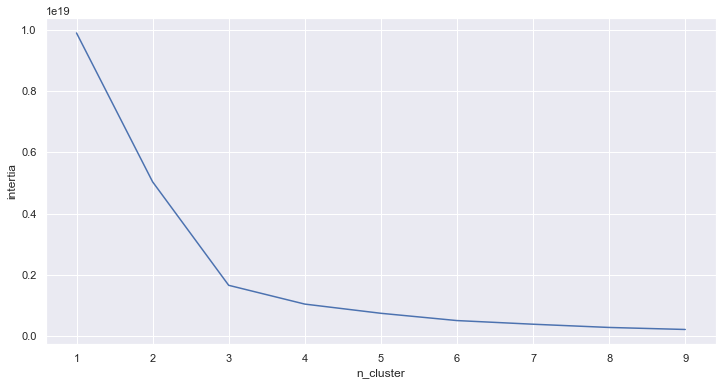

In [25]:
# On peut ensuite faire un graphique pour constater la "cassure" dans la courbe.
# On affiche en  x  le nombre de clusters, la variable k_list et en  y  la liste des inerties intraclasses,
#la variable  inertia:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)
plt.savefig("méthode du coude k-means.png", dpi=300, bbox_inches="tight")

Afin de voir le nombre de cluster le plus pertinent j'ai utilisé la méthode du coude: en regardant nous voyons la "cassure" à 3 groupes.  
En effet l'inertie dimunue lentement si sont décide de découper en un plus grand nombre de groupe

## méthode silhouette

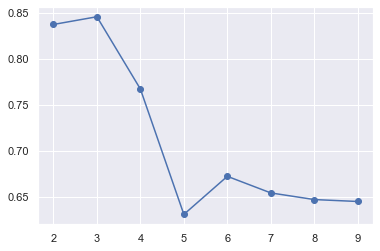

In [26]:
#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(df_complet2)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(df_complet2, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig("méthode silhouette k-means.png", dpi=300, bbox_inches="tight")
plt.show()

L'utilisation de la méthode des silhouettes vient confirmer le clustering en trois groupe est le plus pertinent.  
La petite remonter indique que le découpage en 6 groupes est aussi pertinente.

## 3.2 réalisation du clustering et visualisation

### 3.2.1 kmeans 3 clusters

In [88]:
# on fit le kmeans
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X)

KMeans(n_clusters=3)

In [89]:
# création d'une variable correspondant au numéro de cluster kmeans
labels_3 = kmeans_3.labels_
labels_3

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [90]:
# ajout une colonne cluster avec le numéo de cluster correspondant
df_complet2["cluster_km3"] = labels_3 + 1
df_complet2

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil,cluster_km3,cluster_km6
Zone,,,,,,,,,
Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,0.0,1,2
Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2,2,5
Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8,1,2
Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2,1,2
Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2,2,1
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,9487203.0,1.330455,433000000.0,43.47,42828.653410,0.62,0.0,2,5
Équateur,16785361.0,1.752986,0.0,19.31,6100.410171,-0.07,18.9,1,2
États-Unis d'Amérique,325084756.0,0.636376,123000000.0,55.68,60297.391594,0.29,2.0,1,6


In [91]:
# affichege des centroides pour chacun des clusters afin d'avoir leur score par variable
centroide_km3 = df_complet2.groupby("cluster_km3").mean()
centroide_km3

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil,cluster_km6
cluster_km3,,,,,,,,
1,2.510945e+07,1.261499,4.424204e+07,19.825732,12765.897986,-0.069809,30.953503,2.522293
2,5.708973e+07,0.977848,7.110909e+08,30.603636,31516.439517,0.064545,13.481818,2.818182
3,1.379849e+09,0.774195,2.260000e+08,7.275000,5317.332993,-0.380000,44.600000,3.000000


En observant les centroïdes des trois clusters, le cluster numéro 3 a de meilleurs moyenne sur toute les variables et semble être celui qui répond le plus à notre objectif de trouver les pays où exporter nos volailles.

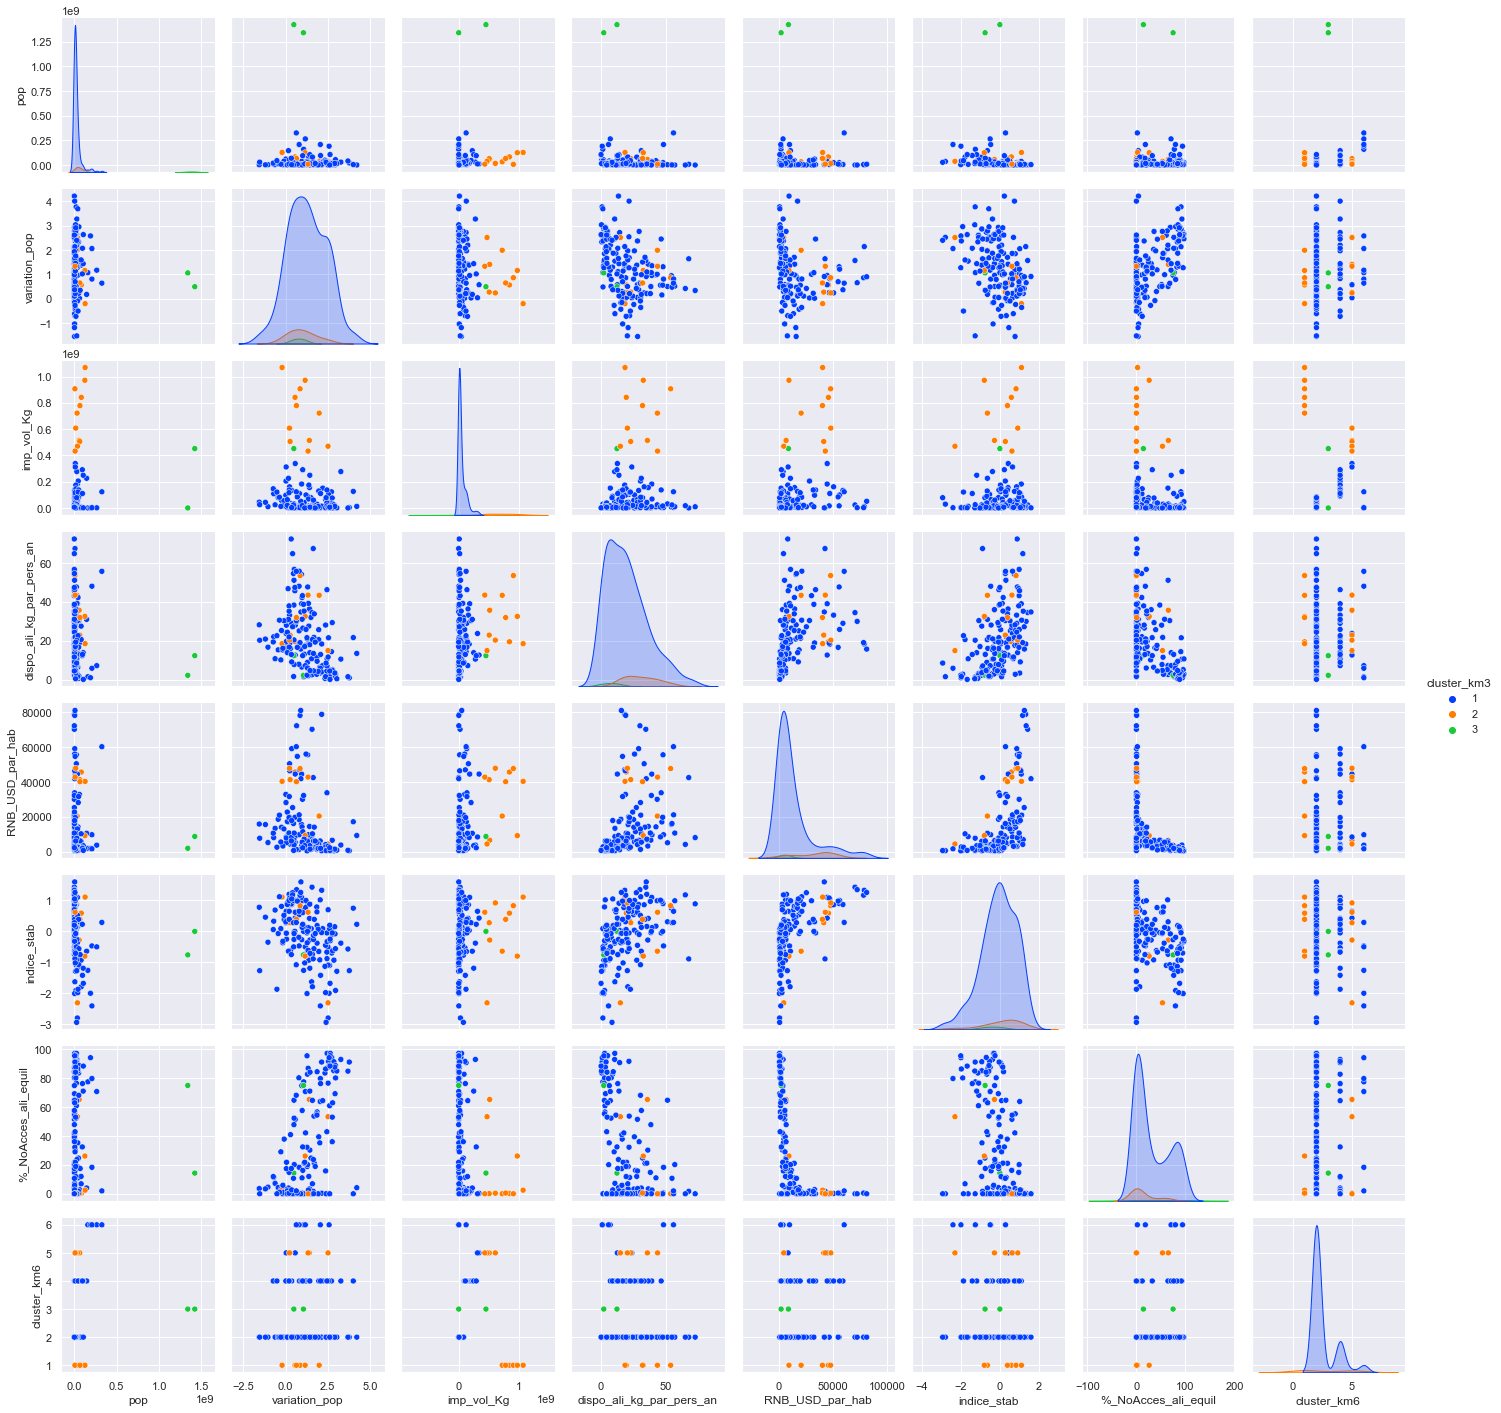

In [92]:
# Affichons cela de façon graphique :
sns.pairplot(df_complet2, hue="cluster_km3", palette="bright")
plt.savefig("graph coisés k-means.png", dpi=300, bbox_inches="tight")

Sur cette visualisation les clusters 2 et 3 semblent se détacher. Une visualisation sous forme de boxplot semble encore une fois pertinente pour faire des comparaison plus effective.  
Comme lors de la CAH l'Inde et la Chine forme un cluster à eux deux avec le Kmeans.

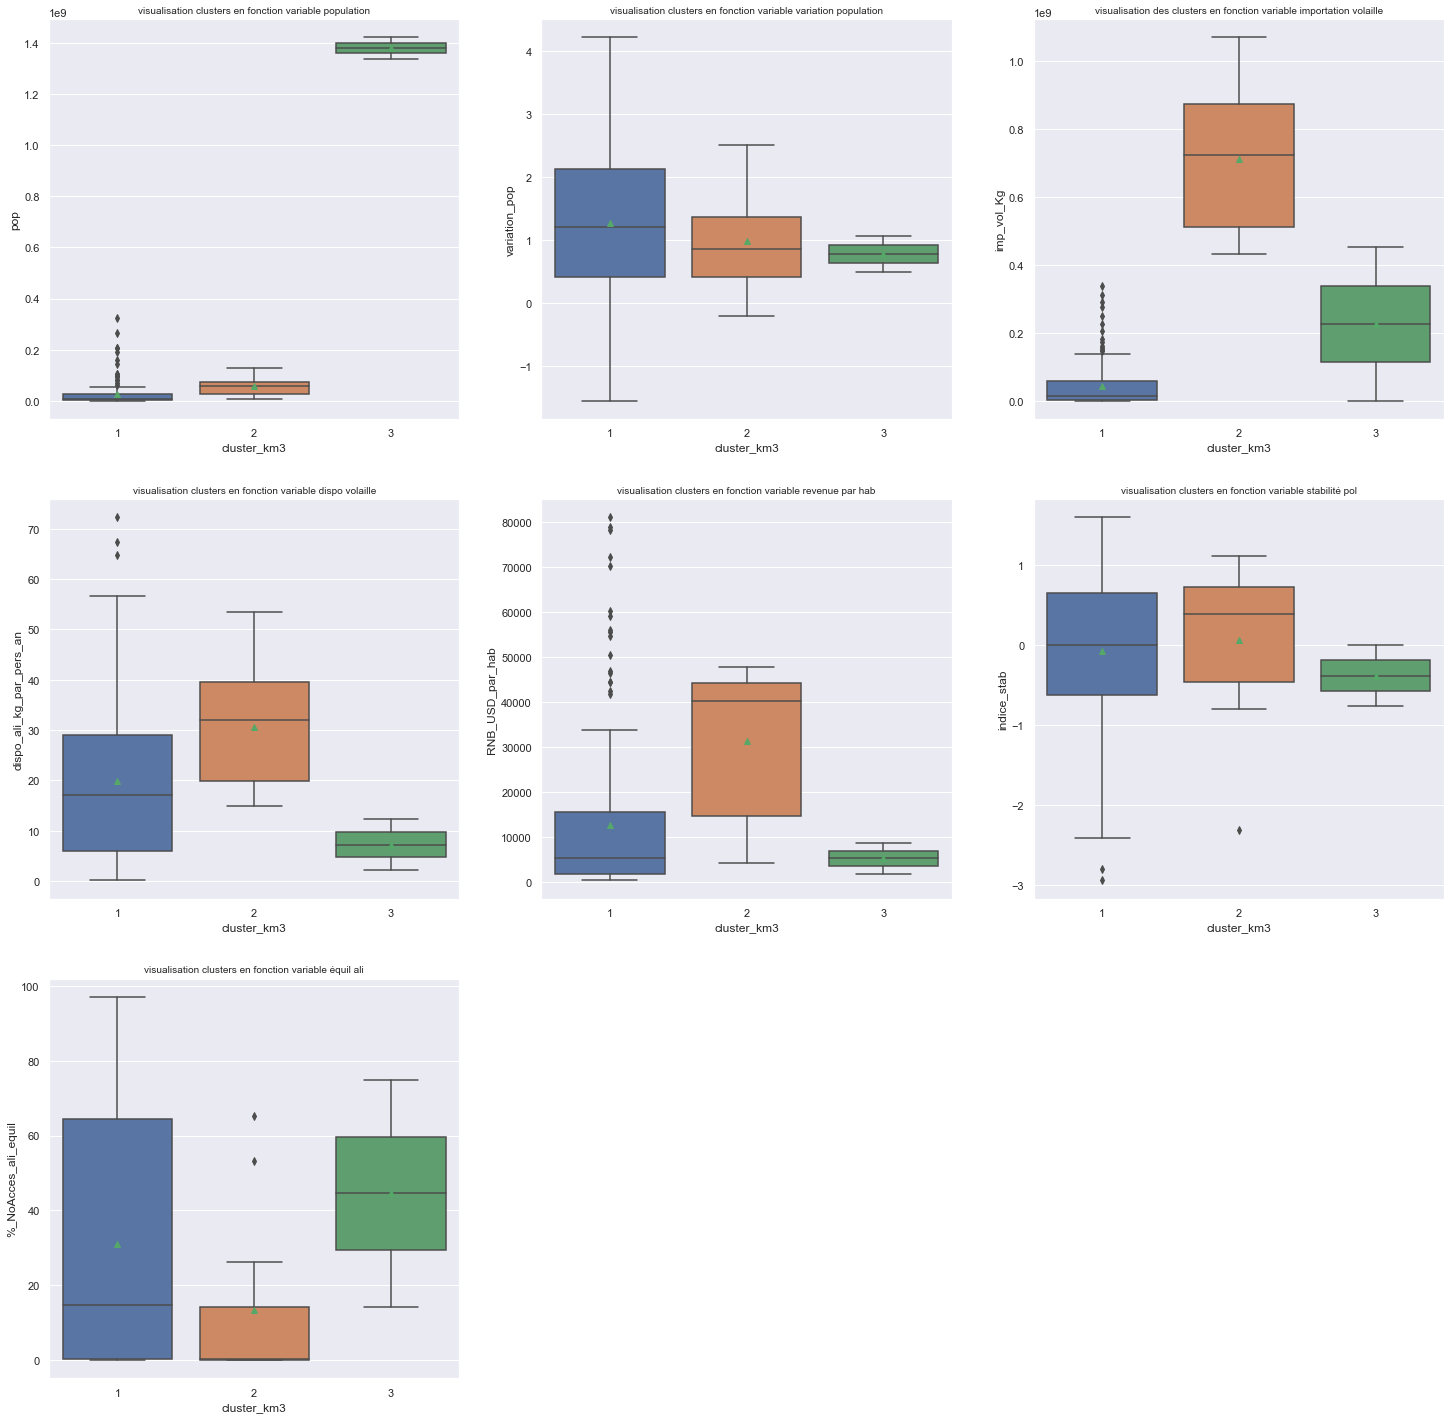

In [93]:
# visualisation en boxplot
plt.figure(figsize=(25,25))

plt.subplot(331)
sns.boxplot(data=df_complet2, x="cluster_km3", y="pop", showmeans=True)
plt.title("visualisation clusters en fonction variable population", fontsize =10)

plt.subplot(332)
sns.boxplot(data=df_complet2, x="cluster_km3", y="variation_pop", showmeans=True)
plt.title("visualisation clusters en fonction variable variation population", fontsize =10)


plt.subplot(333)
sns.boxplot(data=df_complet2, x="cluster_km3", y="imp_vol_Kg", showmeans=True)
plt.title("visualisation des clusters en fonction variable importation volaille", fontsize =10)

plt.subplot(334)
sns.boxplot(data=df_complet2, x="cluster_km3", y="dispo_ali_kg_par_pers_an", showmeans=True)
plt.title("visualisation clusters en fonction variable dispo volaille", fontsize =10)

plt.subplot(335)
sns.boxplot(data=df_complet2, x="cluster_km3", y="RNB_USD_par_hab", showmeans=True)
plt.title("visualisation clusters en fonction variable revenue par hab", fontsize =10)

plt.subplot(336)
sns.boxplot(data=df_complet2, x="cluster_km3", y="indice_stab", showmeans=True)
plt.title("visualisation clusters en fonction variable stabilité pol", fontsize =10)

plt.subplot(337)
sns.boxplot(data=df_complet2, x="cluster_km3", y="%_NoAcces_ali_equil", showmeans=True)
plt.title("visualisation clusters en fonction variable équil ali", fontsize =10)

plt.savefig("boxplot k-means 3.png", dpi=300, bbox_inches="tight")
plt.show()

* concernant la variable population comme pour les observations du CAH c'est le cluster composé par la Chine et l'inde arrive en tête.
* concernant la variaton de population, la médiane des cluster est assez proche mais l'extremité de leur quartile sont très éloignées.
* concernant l'importation de volailles en kilo, c'est le cluster 2 qui est largement en tête avec une médiane à environ 700 millions de kilo de volaille importée.
* concernant la diponibilité de volaille par habitant, c'est également le cluster 2 qui arrive en tête avec une mediane d'environ 35 kg par habitant. le dernier quartile du cluster 1 est supérieur à celui du cluster 2 mais avec une médiane bien inférieur.
* concernant le revenu par habitant, le cluster 2 est encore en tête avec la médiane la plus haute.
* concernant la stabilité politique, le cluster 2 est encore une fois le premier sachant que c'est le seul qui à un score positif
* concernant les difficultés d'acces à une alimentiton diversifier, le cluster 2 est celui qui a la plus basse médiane ce qui signifit que les populaiton des pays de ces clusters ont un meilleur acces à une bonne alimentation.

Le cluster 1 est celui qui est à éviter dans cette analyse.  
Sur la visualisation en boxplot, le cluster 2 se détache des autres en obtenant de meilleur score sur quasiment tout les variables.

In [94]:
# récupération de la liste des pays constituant le 2eme cluster
df_clustersK3 = df_complet2.loc[df_complet2["cluster_km3"] == 2]
df_clustersK3

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil,cluster_km3,cluster_km6
Zone,,,,,,,,,
Afrique du Sud,57009756.0,1.406970,5.140000e+08,35.69,6537.504869,-0.28,65.2,2,5
Allemagne,82658409.0,0.562122,8.420000e+08,19.47,45734.557505,0.59,0.2,2,1
Arabie saoudite,33101179.0,1.987035,7.220000e+08,43.36,20451.017286,-0.64,0.0,2,1
Chine - RAS de Hong-Kong,7306322.0,0.859256,9.070000e+08,53.51,47724.637597,0.83,0.0,2,1
France,64842509.0,0.269751,5.060000e+08,22.90,41372.562733,0.28,0.1,2,5
Iraq,37552781.0,2.508866,4.700000e+08,14.95,4389.505429,-2.31,53.3,2,5
Japon,127502725.0,-0.204341,1.069000e+09,18.50,40369.112621,1.11,2.5,2,1
Mexique,124777324.0,1.157220,9.720000e+08,32.52,9189.424483,-0.80,26.1,2,1
Pays-Bas,17021347.0,0.235305,6.080000e+08,20.33,47903.524246,0.92,0.4,2,5


Nous finissons avec 11 pays qui composent le cluster 2  
la sélection est beaucoup plus restreinte que celle dont nous disposons avec la CAH

### 3.2.2 kmeans 6 clusters

In [95]:
# on fit le kmeans
kmeans_6 = KMeans(n_clusters=6)
kmeans_6.fit(X)

KMeans(n_clusters=6)

In [96]:
# création d'une variable correspondant au numéro de cluster kmeans
labels_6 = kmeans_6.labels_
labels_6

array([0, 4, 0, 0, 1, 3, 0, 1, 0, 0, 0, 3, 0, 0, 5, 0, 4, 0, 0, 0, 0, 5,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 3, 2, 0, 0, 3, 0, 0, 3, 0, 3, 0,
       0, 0, 3, 0, 0, 0, 0, 4, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 5, 0, 4, 3, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0,
       0, 3, 0, 5, 0, 0, 4, 3, 0, 0, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 4, 0, 5, 0, 0])

In [97]:
# ajout une colonne cluster avec le numéo de cluster correspondant
df_complet2["cluster_km6"] = labels_6 + 1
df_complet2

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil,cluster_km3,cluster_km6
Zone,,,,,,,,,
Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,0.0,1,1
Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2,2,5
Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8,1,1
Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2,1,1
Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2,2,2
...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,9487203.0,1.330455,433000000.0,43.47,42828.653410,0.62,0.0,2,5
Équateur,16785361.0,1.752986,0.0,19.31,6100.410171,-0.07,18.9,1,1
États-Unis d'Amérique,325084756.0,0.636376,123000000.0,55.68,60297.391594,0.29,2.0,1,6


In [98]:
# affichege des centroides pour chacun des clusters afin d'avoir leur score par variable
centroide_km6 = df_complet2.groupby("cluster_km6")[["pop", "variation_pop", "imp_vol_Kg", "dispo_ali_kg_par_pers_an", "RNB_USD_par_hab", "indice_stab", "%_NoAcces_ali_equil"]].mean()
centroide_km6

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
cluster_km6,,,,,,,
1,1.342111e+07,1.293497,1.854839e+07,19.297339,11106.097180,-0.062581,31.911290
2,7.367890e+07,0.834163,8.818333e+08,33.216667,33941.514000,0.246667,4.883333
3,1.379849e+09,0.774195,2.260000e+08,7.275000,5317.332993,-0.380000,44.600000
4,3.501969e+07,1.106933,1.607308e+08,22.609615,19367.082637,0.104615,21.546154
5,3.288889e+07,1.053901,4.781667e+08,24.998333,31266.475804,-0.056667,19.883333
6,2.260057e+08,1.384910,2.150000e+07,19.878333,13163.113441,-1.058333,57.033333


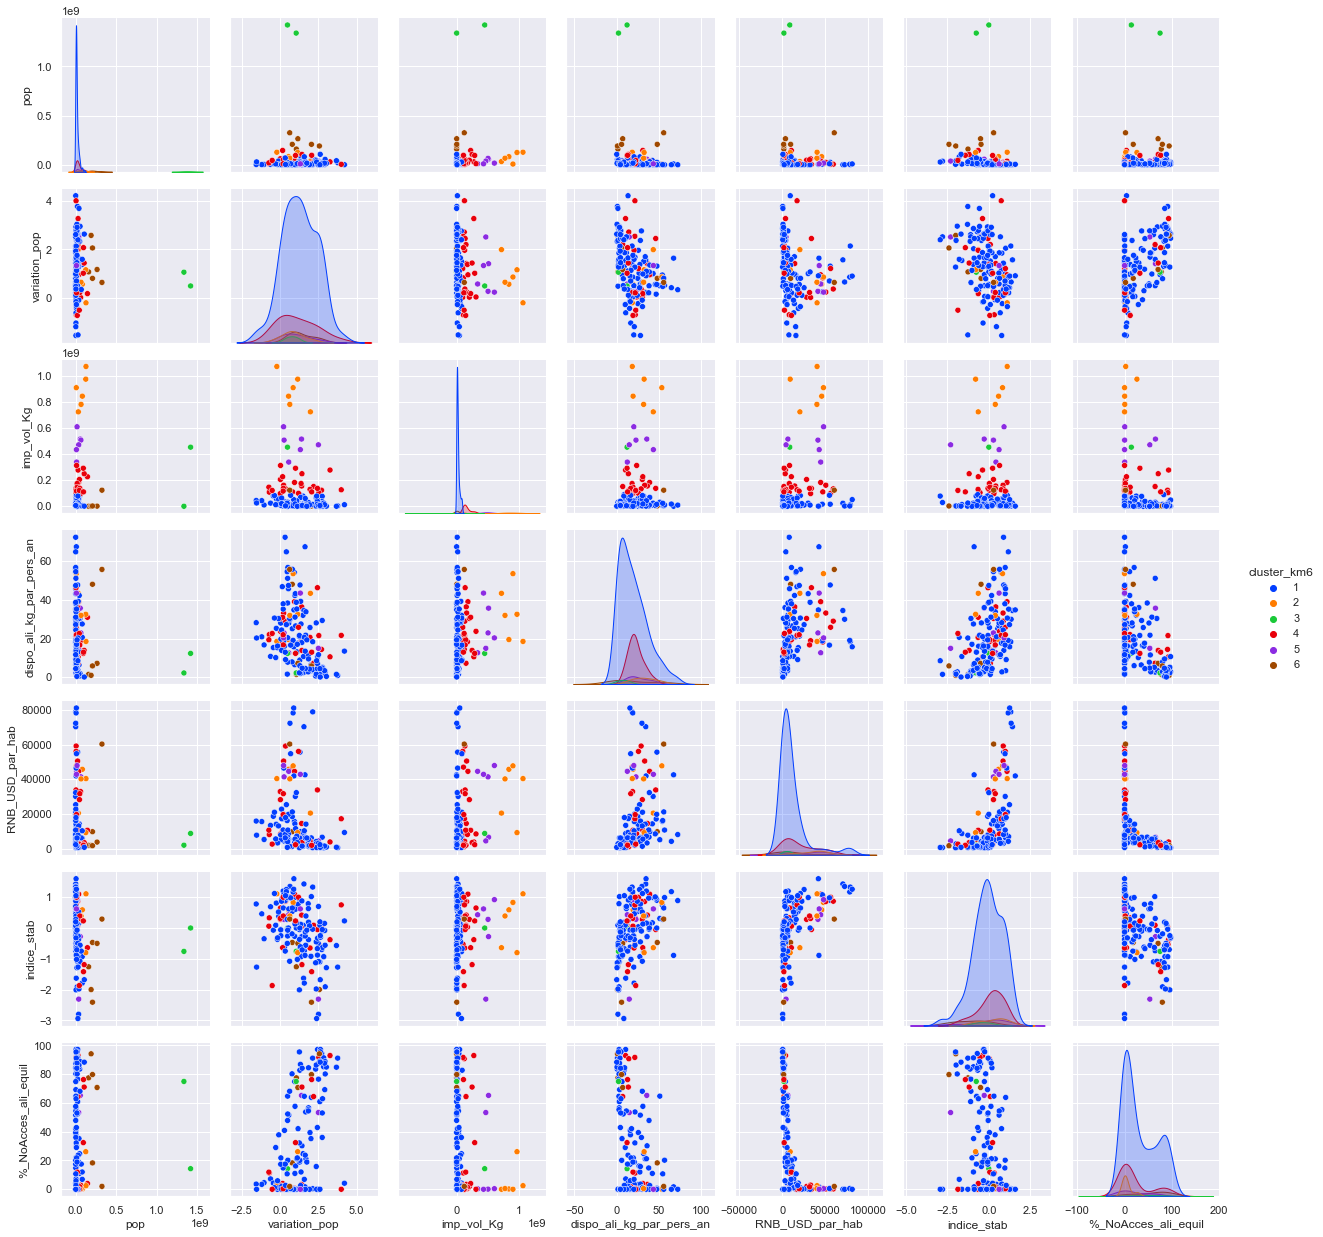

In [99]:
# Affichons cela de façon graphique :
sns.pairplot(df_complet2[["pop", "variation_pop", "imp_vol_Kg", "dispo_ali_kg_par_pers_an", "RNB_USD_par_hab", "indice_stab", "%_NoAcces_ali_equil", "cluster_km6"]], hue="cluster_km6", palette="bright")
plt.savefig("graph coisés k-means.png", dpi=300, bbox_inches="tight")

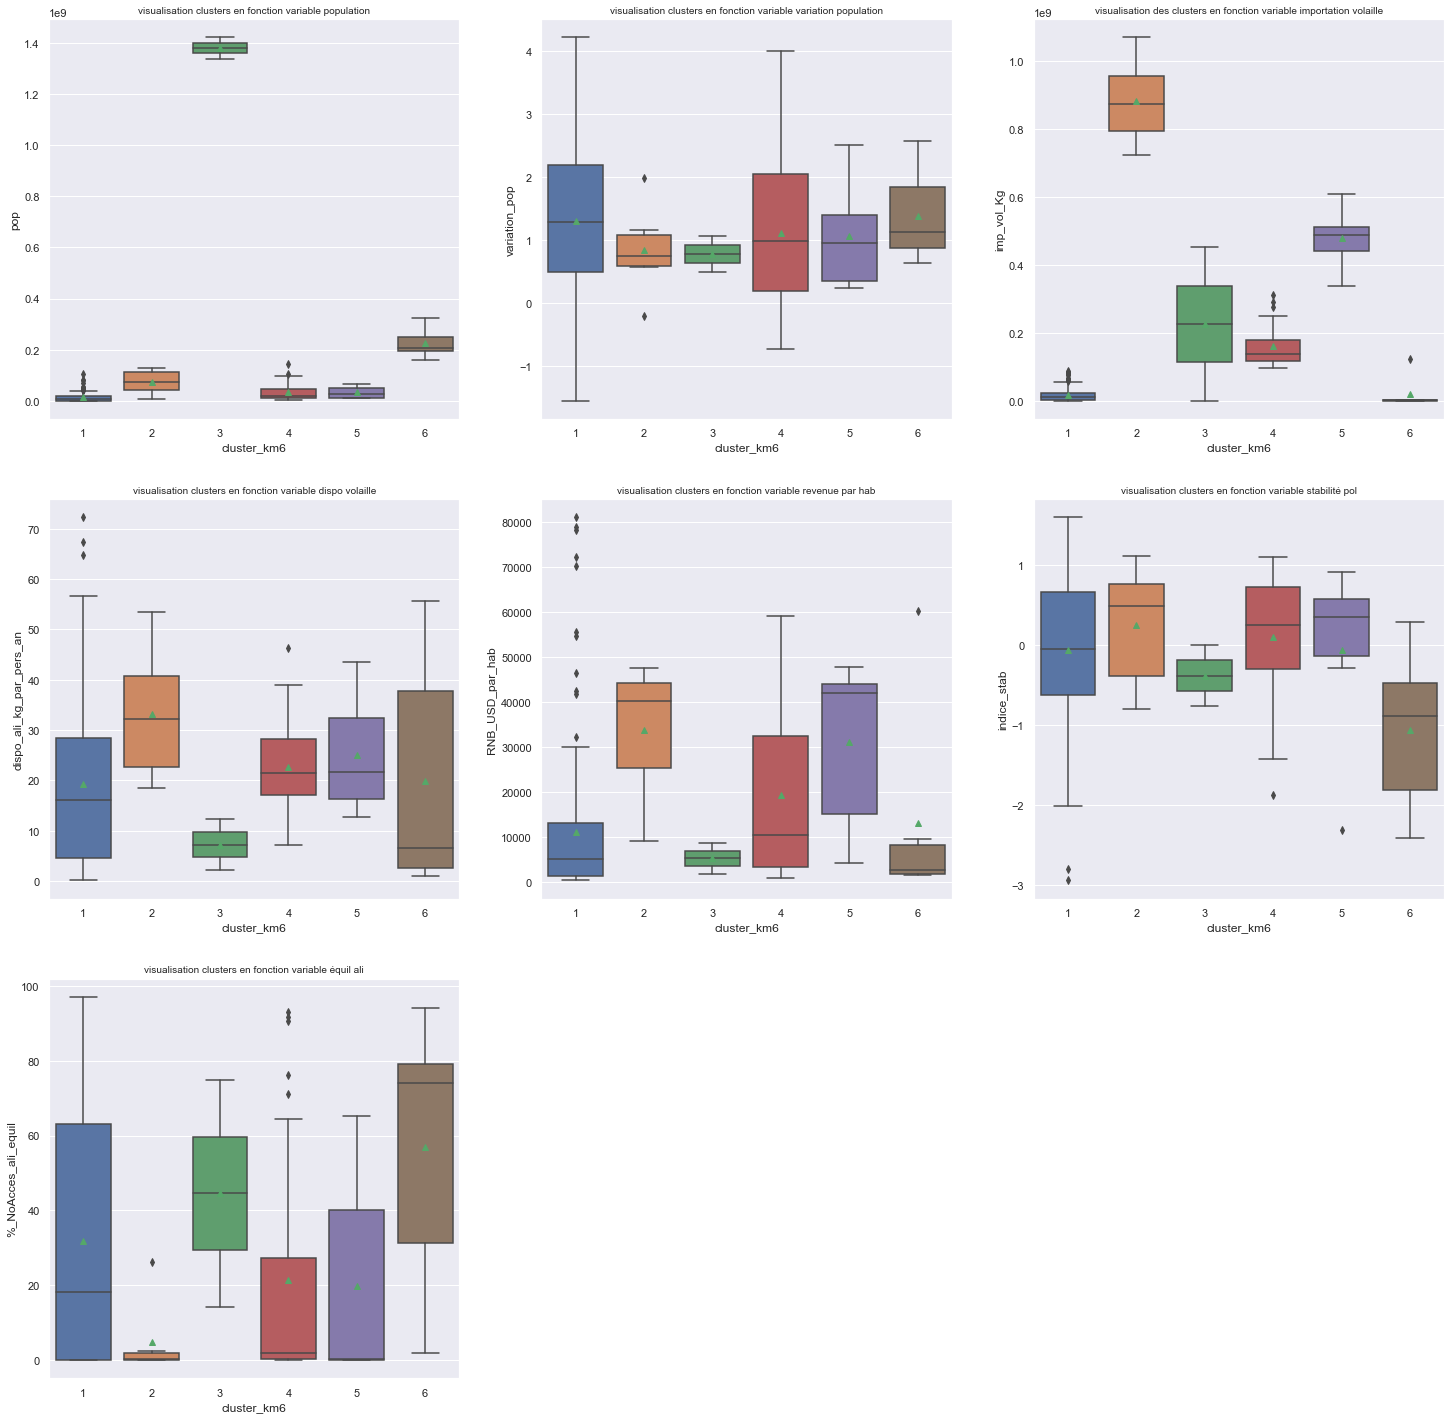

In [100]:
# visualisation en boxplot
plt.figure(figsize=(25,25))

plt.subplot(331)
sns.boxplot(data=df_complet2, x="cluster_km6", y="pop", showmeans=True)
plt.title("visualisation clusters en fonction variable population", fontsize =10)

plt.subplot(332)
sns.boxplot(data=df_complet2, x="cluster_km6", y="variation_pop", showmeans=True)
plt.title("visualisation clusters en fonction variable variation population", fontsize =10)


plt.subplot(333)
sns.boxplot(data=df_complet2, x="cluster_km6", y="imp_vol_Kg", showmeans=True)
plt.title("visualisation des clusters en fonction variable importation volaille", fontsize =10)

plt.subplot(334)
sns.boxplot(data=df_complet2, x="cluster_km6", y="dispo_ali_kg_par_pers_an", showmeans=True)
plt.title("visualisation clusters en fonction variable dispo volaille", fontsize =10)

plt.subplot(335)
sns.boxplot(data=df_complet2, x="cluster_km6", y="RNB_USD_par_hab", showmeans=True)
plt.title("visualisation clusters en fonction variable revenue par hab", fontsize =10)

plt.subplot(336)
sns.boxplot(data=df_complet2, x="cluster_km6", y="indice_stab", showmeans=True)
plt.title("visualisation clusters en fonction variable stabilité pol", fontsize =10)

plt.subplot(337)
sns.boxplot(data=df_complet2, x="cluster_km6", y="%_NoAcces_ali_equil", showmeans=True)
plt.title("visualisation clusters en fonction variable équil ali", fontsize =10)

plt.savefig("boxplot k-means 5.png", dpi=300, bbox_inches="tight")
plt.show()

* concernant la variable pop: le cluster 3 se détache largement des autres avec aussi le cluster 6 un peu supérieur  au autre qui sont plus proches.
* concernant la variable cariation de pop: les clusters 1 et 4  sont très étendus avec la médiane du cluster 1 légèrement au dessus mais l'ensemble est plutot groupé
* concernant l'importation de volaille: le cluster 2 est largement en tête suivit par le cluster 5. Le cluster 1 et 6 sont très faible
* concernant la dispo par habitant en volaille: le cluster 2 est celui qui a le meilleur résultat et le 3 est dernier
* concernant le RNB par habitant: les cluster 2 a une médiane très posche du cluster 5 qui est plus étendu.
* concernant l'indice de stabilité polilitique 2 et 5 sont encore très proche, le cluster 6 est dernier
* concernant l'acces a une alimentation équilibré: le 2 en étant dernier est le mieux classé car cela signifit que les pays du cluster sont ceux ou la population a un meilleur acces à l'alimentation équilibrée

au cumul le cluster 2 semblent le plus interessant

In [102]:
# récupération de la liste des pays constituant le 2eme cluster
df_clustersK6 = df_complet2.loc[df_complet2["cluster_km6"]== 2]
df_clustersK6

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil,cluster_km3,cluster_km6
Zone,,,,,,,,,
Allemagne,82658409.0,0.562122,8.420000e+08,19.47,45734.557505,0.59,0.2,2,2
Arabie saoudite,33101179.0,1.987035,7.220000e+08,43.36,20451.017286,-0.64,0.0,2,2
Chine - RAS de Hong-Kong,7306322.0,0.859256,9.070000e+08,53.51,47724.637597,0.83,0.0,2,2
Japon,127502725.0,-0.204341,1.069000e+09,18.50,40369.112621,1.11,2.5,2,2
Mexique,124777324.0,1.157220,9.720000e+08,32.52,9189.424483,-0.80,26.1,2,2
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,66727461.0,0.643689,7.790000e+08,31.94,40180.334509,0.39,0.5,2,2


Nous arrivons à une sélection de 6 pays seulement avec ce systeme de clustering

# 4 ACP

## 4.1 relation entre les variables

In [103]:
# Nous allons travailler sur l'ensemble des composantes :
n_components = 7

In [104]:
# On instancie notre ACP :
pca = PCA(n_components=n_components)

In [105]:
# On l'entraine sur les données scalées 
pca.fit(X_scaled)

PCA(n_components=7)

In [106]:
pca.explained_variance_ratio_

array([0.41802953, 0.16698327, 0.12501183, 0.0992854 , 0.08114449,
       0.06427247, 0.04527302])

In [107]:
# poucentage de variance
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([41.8 , 16.7 , 12.5 ,  9.93,  8.11,  6.43,  4.53])

In [108]:
# sum des pourcentage de variance
scree_cum = scree.cumsum().round()
scree_cum

array([ 42.,  58.,  71.,  81.,  89.,  95., 100.])

Les trois premiers composant réunissent 71 % de la variance observée

In [109]:
# Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7]

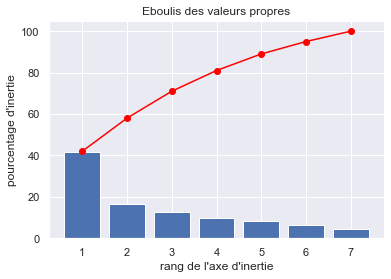

In [110]:
# On peut enfin l'afficher de façon graphique :
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig("éboulis des valeurs propres.png", dpi=300, bbox_inches="tight")
plt.show(block=False)

En observant la courbe d'éboulis nous voyons que les 3 première composantes réunissent la majorité de l'inertie
Nous allons donc travailler sur les trois premier composants.

In [111]:
pcs = pca.components_
pcs

array([[-0.05907343, -0.39349493,  0.19937634,  0.42770952,  0.4374348 ,
         0.43961739, -0.48412091],
       [ 0.75394546, -0.05107368,  0.61807576, -0.07094308,  0.07232313,
        -0.18811464,  0.03590824],
       [ 0.44935112, -0.56393934, -0.55630985,  0.07143122, -0.36704022,
        -0.07231189, -0.15976666],
       [ 0.41688974,  0.31071857, -0.42530191, -0.25888766,  0.46105789,
         0.49416749,  0.15803952],
       [ 0.21156925,  0.48016105, -0.15583665,  0.82136348, -0.08279775,
        -0.1251652 ,  0.05691215],
       [ 0.01729663,  0.19270047, -0.22391989, -0.17076135,  0.40724183,
        -0.60993143, -0.58771212],
       [ 0.08545391,  0.40036421,  0.11594777, -0.19002367, -0.53237757,
         0.36638265, -0.60431046]])

In [112]:
# Affichons la même chose mais version pandas :
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,-0.059073,-0.393495,0.199376,0.427710,0.437435,0.439617,-0.484121
1,0.753945,-0.051074,0.618076,-0.070943,0.072323,-0.188115,0.035908
2,0.449351,-0.563939,-0.556310,0.071431,-0.367040,-0.072312,-0.159767
3,0.416890,0.310719,-0.425302,-0.258888,0.461058,0.494167,0.158040
4,0.211569,0.480161,-0.155837,0.821363,-0.082798,-0.125165,0.056912
5,0.017297,0.192700,-0.223920,-0.170761,0.407242,-0.609931,-0.587712
6,0.085454,0.400364,0.115948,-0.190024,-0.532378,0.366383,-0.604310


In [113]:
# remettons les titres des différentes colonnes
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
F1,-0.06,-0.39,0.20,0.43,0.44,0.44,-0.48
F2,0.75,-0.05,0.62,-0.07,0.07,-0.19,0.04
F3,0.45,-0.56,-0.56,0.07,-0.37,-0.07,-0.16
F4,0.42,0.31,-0.43,-0.26,0.46,0.49,0.16
F5,0.21,0.48,-0.16,0.82,-0.08,-0.13,0.06
F6,0.02,0.19,-0.22,-0.17,0.41,-0.61,-0.59
F7,0.09,0.40,0.12,-0.19,-0.53,0.37,-0.60


In [114]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7
pop,-0.059073,0.753945,0.449351,0.416890,0.211569,0.017297,0.085454
variation_pop,-0.393495,-0.051074,-0.563939,0.310719,0.480161,0.192700,0.400364
imp_vol_Kg,0.199376,0.618076,-0.556310,-0.425302,-0.155837,-0.223920,0.115948
dispo_ali_kg_par_pers_an,0.427710,-0.070943,0.071431,-0.258888,0.821363,-0.170761,-0.190024
RNB_USD_par_hab,0.437435,0.072323,-0.367040,0.461058,-0.082798,0.407242,-0.532378
indice_stab,0.439617,-0.188115,-0.072312,0.494167,-0.125165,-0.609931,0.366383
%_NoAcces_ali_equil,-0.484121,0.035908,-0.159767,0.158040,0.056912,-0.587712,-0.604310


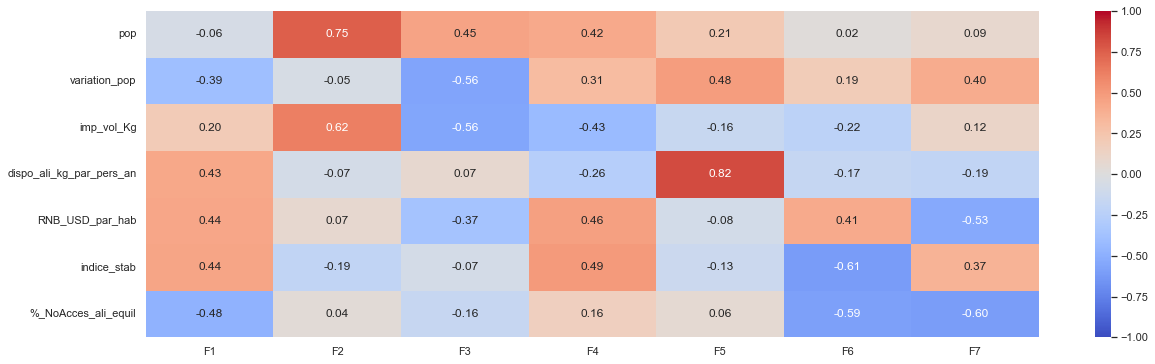

In [115]:
# Et pour une représentation plus visuelle, comme cela :
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig("Heatmap des variable ACP.png", dpi=300, bbox_inches="tight")

* F1 est fortement corrélée avec la dispo alimentaire, le revenu brut par habitant et l'indice de stabilité politique. Elle a aussi une corrélation positive avec importation de volaille au kg. Les corrélation sont négative avec toutes les autres variables. Ce sont les variables sur lesquels les clusters sélectionnés avait de meilleur résultat. Il semble également logique de voir un lien entre le fait qu'un pays soit stable, ait de meilleur revenu par habitant et donc permette un meilleur acces à l'alimentation (et donc volaille).  
* F2 est fortement corrélée avec la variable population et importation volaille au kg mais est très faiblement corrélée avec les autres variables voir, négativement corrélée. Il semble encore une fois logique que les pyas a forte population vont devoir importer plus de produit alimentaire.  
* F3 a une corrélation positive moyenne avec la variable population, très faible avec dispo volaille kg. Toutes les autres corrélations sont négatives.  

In [116]:
# visualisation des corrélations
def correlation_graph(pca, 
                      x_y, 
                      features) : 

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [117]:
x_y = (0,1)
x_y

(0, 1)

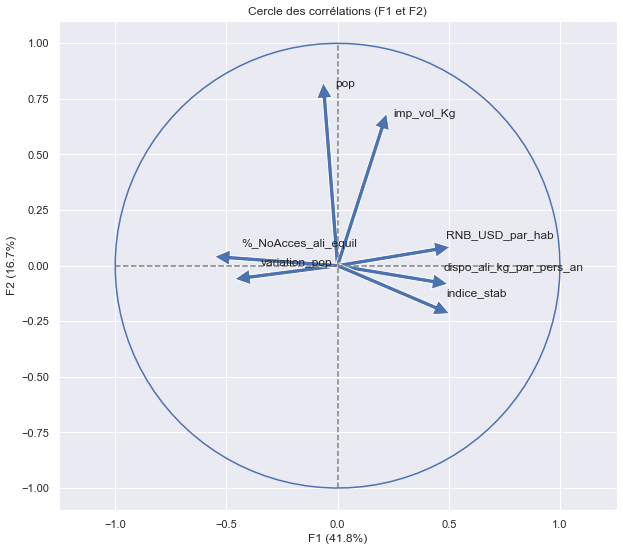

<Figure size 432x288 with 0 Axes>

In [133]:
# corrélation pour F1 et F2
correlation_graph(pca, x_y, features)
plt.savefig("cercle corrélation F1 F2.png", dpi=300, bbox_inches="tight")

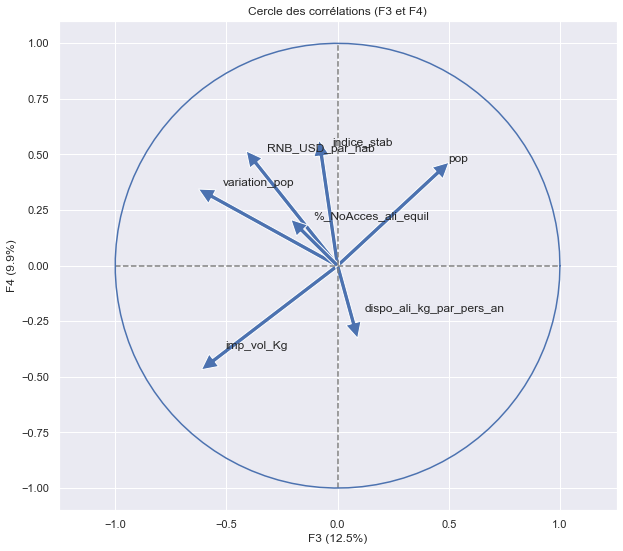

<Figure size 432x288 with 0 Axes>

In [134]:
# corrélation pour F3 et F4 :
correlation_graph(pca, (2,3), features)
plt.savefig("cercle corrélation F3 F4.png", dpi=300, bbox_inches="tight")

## 4.2 projection des pays sur les nouveau plan factoriels

In [120]:
# projetons dans une nouvelle dimension
X_projected = pca.transform(X_scaled)
X_projected

array([[-2.26921957,  0.28198412,  0.05065123, ...,  0.01231973,
         2.57544063,  0.44016356],
       [ 0.02833955,  1.45416387, -1.24353649, ...,  0.65343755,
        -1.26020791, -0.34031834],
       [ 0.20604645, -0.41223498,  0.8051717 , ..., -0.79961227,
        -0.77274202, -0.16577046],
       ...,
       [ 2.76933879,  1.44528181,  0.36263079, ...,  1.62613215,
         0.77111721, -1.17762735],
       [-3.08646556,  0.39138165, -0.2261621 , ...,  0.09663821,
         0.39101495, -0.57053978],
       [-0.72051058, -0.61092041, -0.29649121, ..., -0.25230422,
         0.57717537,  1.5839472 ]])

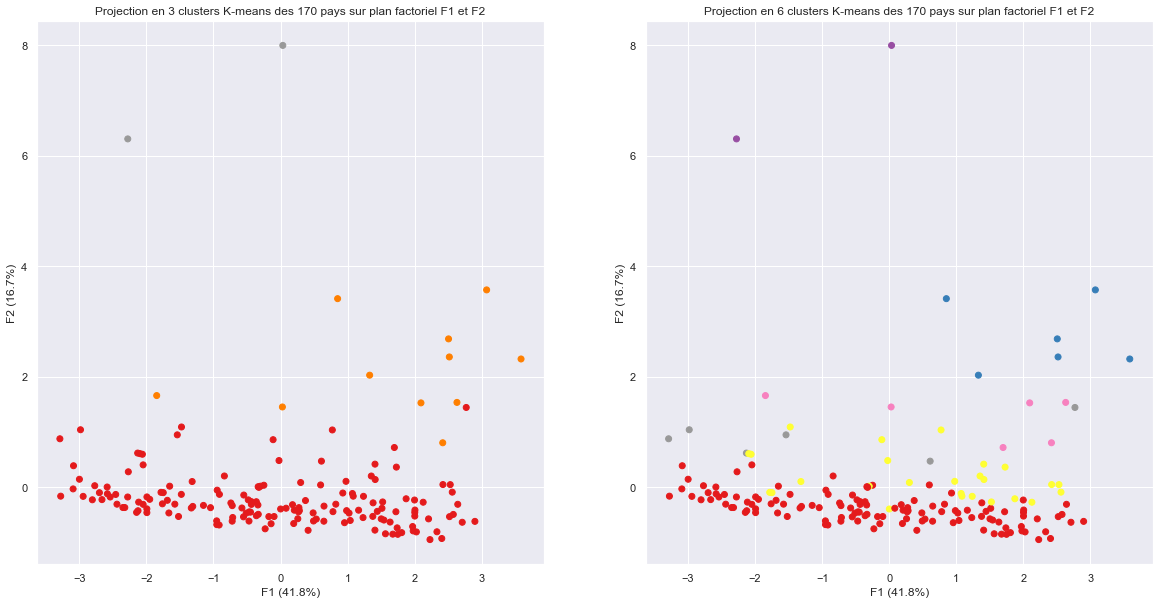

In [135]:
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df_complet2["cluster_km3"], cmap="Set1")
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 3 clusters K-means des 170 pays sur plan factoriel F1 et F2")

plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df_complet2["cluster_km6"], cmap="Set1")
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 6 clusters K-means des 170 pays sur plan factoriel F1 et F2")

plt.savefig("projection sur les plan F1 et F2.png", dpi=300, bbox_inches="tight")
plt.show()

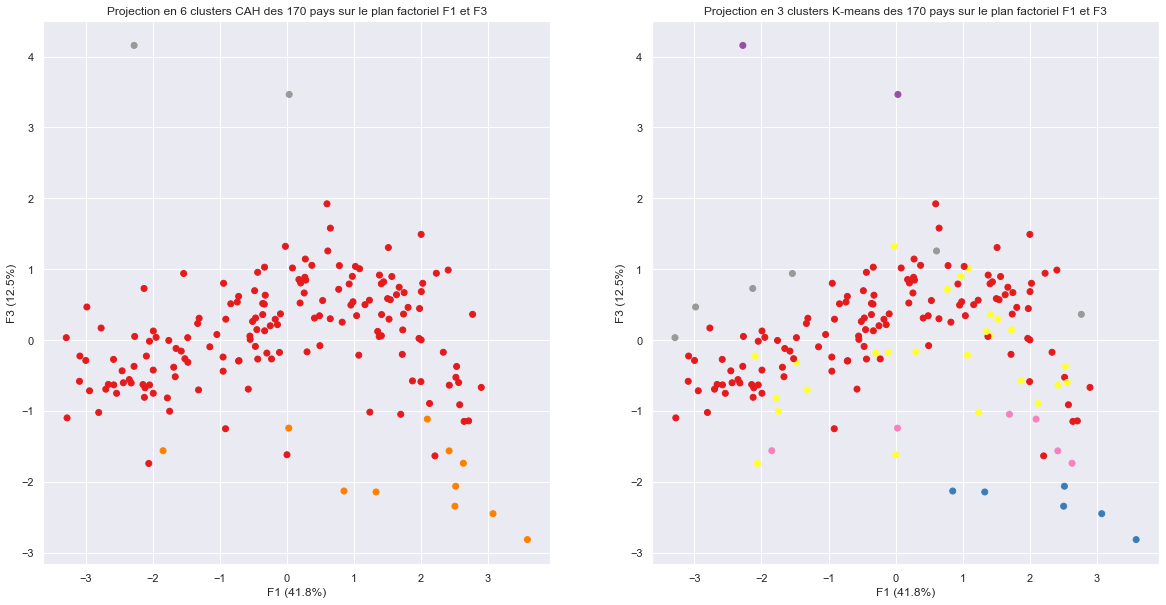

In [136]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 2], c=df_complet2['cluster_km3'], cmap="Set1")
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(3, round(100*pca.explained_variance_ratio_[2],1)))
plt.title("Projection en 6 clusters CAH des 170 pays sur le plan factoriel F1 et F3")

plt.subplot(122)
plt.scatter(X_projected[:, 0], X_projected[:, 2], c=df_complet2['cluster_km6'], cmap="Set1")
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(3, round(100*pca.explained_variance_ratio_[2],1)))
plt.title("Projection en 3 clusters K-means des 170 pays sur le plan factoriel F1 et F3")

plt.savefig("projection sur les plans F1 F3.png", dpi=300, bbox_inches="tight")
plt.show()

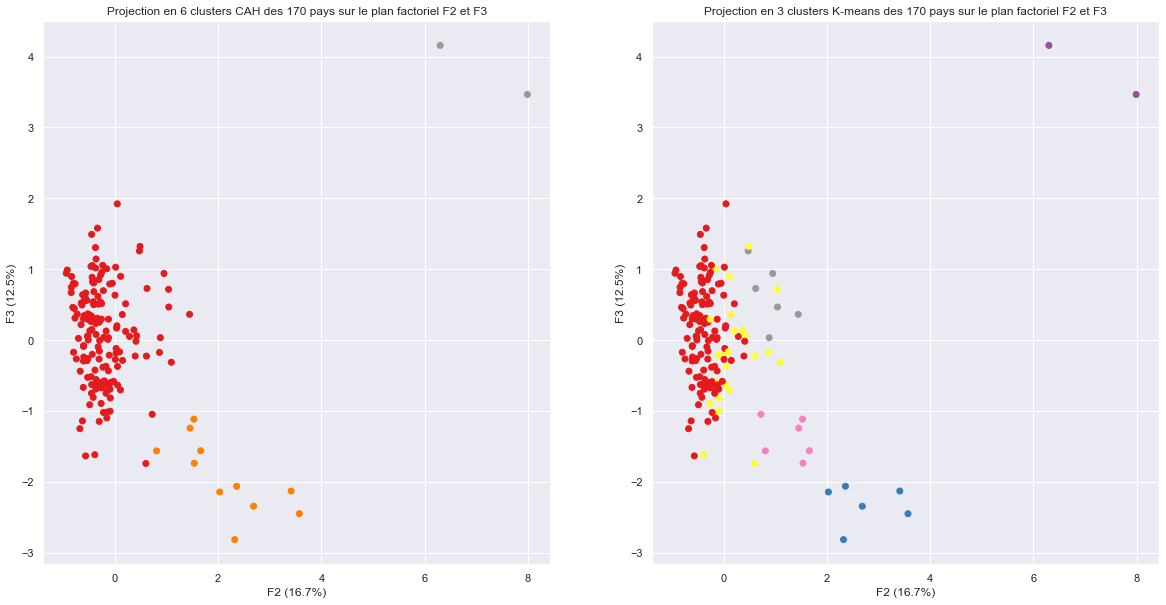

In [137]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(X_projected[:, 1], X_projected[:, 2], c=df_complet2['cluster_km3'], cmap="Set1")
plt.xlabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.ylabel('F{} ({}%)'.format(3, round(100*pca.explained_variance_ratio_[2],1)))
plt.title("Projection en 6 clusters CAH des 170 pays sur le plan factoriel F2 et F3")

plt.subplot(122)
plt.scatter(X_projected[:, 1], X_projected[:, 2], c=df_complet2['cluster_km6'], cmap="Set1")
plt.xlabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.ylabel('F{} ({}%)'.format(3, round(100*pca.explained_variance_ratio_[2],1)))
plt.title("Projection en 3 clusters K-means des 170 pays sur le plan factoriel F2 et F3")

plt.savefig("projetion sur les olans F2 F3.png", dpi=300, bbox_inches="tight")
plt.show()

La représentation en 6 clusters permet d'avoir une analyse plus fine et permettre une meilleur comparaison avec les cluster CAH

# 5 comparaisons des 6 clusters k-means et CAH

In [124]:
# regroupement des pays par cluster et moyenne sur les variables
centroide_cah = df_complet1.groupby("cluster")[["pop", "variation_pop", "imp_vol_Kg", "dispo_ali_kg_par_pers_an", "RNB_USD_par_hab", "indice_stab", "%_NoAcces_ali_equil"]].mean()
centroide_cah

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
cluster,,,,,,,
1,2.470654e+07,1.365225,5.301887e+07,21.629623,6241.125170,-0.144528,21.116981
2,1.593866e+07,0.135287,4.502381e+07,31.535714,16614.690606,0.439524,5.400000
3,9.339853e+06,0.924083,6.100000e+07,28.245333,57791.696196,1.131333,0.280000
4,5.448442e+07,0.741255,7.176000e+08,29.865000,38032.092853,0.373000,3.010000
5,1.379849e+09,0.774195,2.260000e+08,7.275000,5317.332993,-0.380000,44.600000
6,3.971579e+07,2.281227,4.116667e+07,5.335000,1565.287655,-0.869792,75.577083


In [125]:
# affichege des centroides pour chacun des clusters afin d'avoir leur score par variable
centroide_km6 = df_complet2.groupby("cluster_km6")[["pop", "variation_pop", "imp_vol_Kg", "dispo_ali_kg_par_pers_an", "RNB_USD_par_hab", "indice_stab", "%_NoAcces_ali_equil"]].mean()
centroide_km6

,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
cluster_km6,,,,,,,
1,1.342111e+07,1.293497,1.854839e+07,19.297339,11106.097180,-0.062581,31.911290
2,7.367890e+07,0.834163,8.818333e+08,33.216667,33941.514000,0.246667,4.883333
3,1.379849e+09,0.774195,2.260000e+08,7.275000,5317.332993,-0.380000,44.600000
4,3.501969e+07,1.106933,1.607308e+08,22.609615,19367.082637,0.104615,21.546154
5,3.288889e+07,1.053901,4.781667e+08,24.998333,31266.475804,-0.056667,19.883333
6,2.260057e+08,1.384910,2.150000e+07,19.878333,13163.113441,-1.058333,57.033333


Lorsque l'on observe les centroïdes nous remarquons qu'un cluster est commun dans les 2 méthodes de clustering (CAH cluster 5, kmeans cluster 3): il s'agit de cluster composé de la chine et de l'inde  
Tout les autres sont différents, les 2 méthodes de clustering ont donc aboutis à des résultats différents.

In [127]:
sample_K6 = df_clustersK6.sample(6)
sample_cah = cluster_cah.sample(6)
table = pd.crosstab(sample_K6.index, sample_cah.index, margins=False)
stat, p, dof, expected = stats.chi2_contingency(table)
print("Test de Chi 2 (2 catégorielles)")
print("Stat = %.3f\np-value = %.35f" % (stat, p))
if p > .05:
    print("H0: les deux échantillons sont indépendant")
else:
    print("H1: il y a une dépendance entre les 2 échantillons.")

Test de Chi 2 (2 catégorielles)
Stat = 30.000
p-value = 0.22428900483440342150665003373433137
H0: les deux échantillons sont indépendant


In [128]:
df_cumul_clust = pd.merge(df_complet2, df_complet1['cluster'], on= df_complet1.index, how="left")
df_cumul_clust

,key_0,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil,cluster_km3,cluster_km6,cluster
0,Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,0.0,1,1,6
1,Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2,2,5,1
2,Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8,1,1,2
3,Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2,1,1,6
4,Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...
165,Émirats arabes unis,9487203.0,1.330455,433000000.0,43.47,42828.653410,0.62,0.0,2,5,4
166,Équateur,16785361.0,1.752986,0.0,19.31,6100.410171,-0.07,18.9,1,1,1
167,États-Unis d'Amérique,325084756.0,0.636376,123000000.0,55.68,60297.391594,0.29,2.0,1,6,2
168,Éthiopie,106399924.0,2.628256,1000000.0,0.13,705.544502,-1.68,88.3,1,1,6


In [132]:
pd.crosstab(clusters, labels_6+1)

col_0,1,2,3,4,5,6
row_0,,,,,,
1,43,0,0,8,1,1
2,34,0,0,7,0,1
3,10,0,0,5,0,0
4,0,6,0,0,4,0
5,0,0,2,0,0,0
6,37,0,0,6,1,4


le cluster kmeans (col_2) retenu est le cluster 2. Pour le CAH (row_0) nous avions retenu clusters 3 et 4.  
les 6 pays de notre cluster 2 du kmeans sont dans le cluster 4 selectionné 